In [23]:
# Automatically reload modules when they change
%reload_ext autoreload
%autoreload 2

Loading dataset

In [24]:
from nn import *
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import copy
import nn.loss_functions as loss_module

loss_fn = loss_module.LogLinear()


In [25]:

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

Data exploration: Domain Knowledge, Data Cleaning/Preprocessing, Feature Creation/Construction/Transformation (Sums, Average, Check Existence, Log/Exp), Feature Encoding/Standardization (Scaling, One-Hot-Encodind, Flattening), Feature Selection (Identify Most Relevant Features)

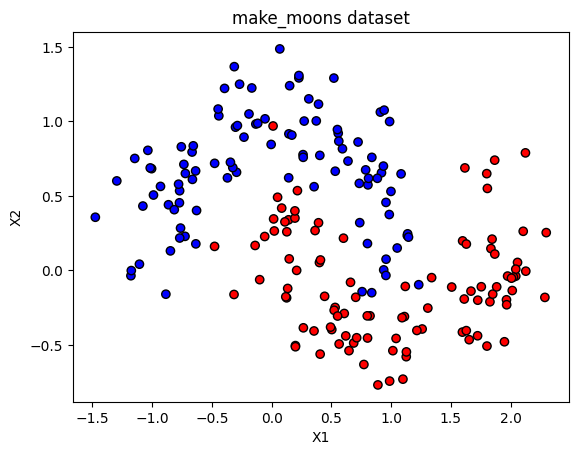

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("make_moons dataset")
plt.show()

In [27]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X, y = X.tolist(), [[val] for val in y.tolist()]

Data Split

In [28]:
num_datapoints = 200
num_train = int(num_datapoints * 0.8)
num_val = int(num_datapoints * 0.1)
num_test = int(num_datapoints * 0.1)

trainX, trainY = X[:num_train], y[:num_train]
valX, valY = X[num_train:num_train + num_val], y[num_train:num_train + num_val]
testX, testY = X[num_train + num_val:], y[num_train + num_val:]

print(len(trainX), len(trainY), len(valX), len(valY), len(testX), len(testY))

160 160 20 20 20 20


Selecting Model

In [ ]:
nn = NeuralNetwork([
    FullyConnected(2, 16, init=HeKaiming()),
    ReLU(),
    FullyConnected(16, 32, init=HeKaiming()),
    ReLU(),
    Dropout(0.5),
    FullyConnected(32, 1, init=RandomNormal()),
    Sigmoid()
])

Hyperparameter Turning (Use Cross Validation) 
* Loss Function
* Optimizer (learning_rate, weight_decay, ...)
* Number of Epoch
* Model Specific (Initializations, Number of Neurons/Layers)

In [84]:
learning_rate = 0.005
weight_decay = 0.00

num_epochs = 2500

# loss_fn = LogLinear()
optimizer = Adam(learning_rate=learning_rate, weight_decay=weight_decay)
metric = Accuracy()

Train Model With Best Hyperparameters (Use Cross Validation to Select the Best Model)

In [85]:
nn.init_params()

best_model = None
best_val_acc = 0.0

for epoch in range(num_epochs):
    nn.train(trainX, trainY, loss_fn, optimizer)
    loss = loss_fn.loss_value

    if (epoch + 1) % 100 == 0 or epoch == 0:
        train_acc = nn.evaluate(trainX, trainY, metric)
        val_acc = nn.evaluate(valX, valY, metric)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

        # Save the best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = copy.deepcopy(nn)

Epoch 1/2500, Loss: 0.8952, Train Acc: 0.5375, Val Acc: 0.4500
Epoch 100/2500, Loss: 0.0634, Train Acc: 0.9812, Val Acc: 1.0000
Epoch 200/2500, Loss: 0.0449, Train Acc: 0.9812, Val Acc: 1.0000
Epoch 300/2500, Loss: 0.0320, Train Acc: 0.9875, Val Acc: 0.9500
Epoch 400/2500, Loss: 0.0213, Train Acc: 0.9875, Val Acc: 0.9500
Epoch 500/2500, Loss: 0.0248, Train Acc: 0.9938, Val Acc: 0.9500
Epoch 600/2500, Loss: 0.0187, Train Acc: 0.9938, Val Acc: 0.9500
Epoch 700/2500, Loss: 0.0239, Train Acc: 0.9938, Val Acc: 0.9500
Epoch 800/2500, Loss: 0.0136, Train Acc: 0.9938, Val Acc: 0.9500
Epoch 900/2500, Loss: 0.0136, Train Acc: 0.9938, Val Acc: 0.9500
Epoch 1000/2500, Loss: 0.0104, Train Acc: 0.9938, Val Acc: 0.9500
Epoch 1100/2500, Loss: 0.0163, Train Acc: 0.9938, Val Acc: 0.9500
Epoch 1200/2500, Loss: 0.0146, Train Acc: 0.9938, Val Acc: 0.9500
Epoch 1300/2500, Loss: 0.0125, Train Acc: 0.9938, Val Acc: 0.9500
Epoch 1400/2500, Loss: 0.0150, Train Acc: 0.9938, Val Acc: 0.9500
Epoch 1500/2500, Loss:

Evaluate the Model with Test

In [87]:
test_acc = best_model.evaluate(testX, testY, metric)

print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9500
